# <u>Avocado Dataset Analysis and ML Prediction</u>

## Table of Contents

* [Problem Statement](#section1)<br>
* [Data Loading and Description](#section2)
* [Data Profiling](#section3)
    - * [Understanding the Dataset](#section4)<br/>
    - * [Profiling](#section5)<br/>
    - * [Preprocessing](#section6)<br/>
* [Data Visualisation and Questions answered](#section7)<br/>
    - * [Q.1 Which type of Avocados are more in demand (Conventional or Organic)?](#section8)<br/>
    - * [Q.2 In which range Average price lies, what is distribution look like?](#section9)<br/>
    - * [Q.3 How Average price is distributed over the months for Conventional and Organic Types?](#section10)<br/>
    - * [Q.4 What are TOP 5 regions where Average price are very high?](#section11)<br/>
    - * [Q.5 What are TOP 5 regions where Average consumption is very high?](#section12)<br/>
    - * [Q.6 In which year and for which region was the Average price the highest?](#section13)<br/>
    - * [Q.7 How price is distributed over the date column?](#section14)<br/>
    - * [Q.8 How dataset features are correlated with each other?](#section15)<br/>
* [Feature Engineering for Model building](#section16)<br/>
* [Model selection/predictions](#section17)<br/>
    - * [P.1 Are we good with Linear Regression? Lets find out.](#section18)<br/>
    - * [P.2 Are we good with Decision Tree Regression? Lets find out.](#section19)<br/>
    - * [P.3 Are we good with Random Forest Regressor? Lets find out.](#section20)<br/>
    - * [Lets see final Actual Vs Predicted sample.](#section21)<br/>
* [Conclusions](#section22)<br/>  

<a id=section1></a>

### * Problem Statement

- The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __(EDA)__ for analysis purpose.

- In this study, we will try to see if we can predict the Avocado’s Average Price based on different features. The features are different (Total Bags,Date,Type,Year,Region…).

<ul>The variables of the dataset are the following:</ul>

* Categorical: ‘region’,’type’
* Date: ‘Date’
* Numerical:’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
* Target:‘AveragePrice’


<a id=section2></a>

### * Data Loading and Description

- This data was downloaded and provided by INSAID, from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
- Represents weekly 2018 retail scan data for National retail volume (units) and price.
- The dataset comprises of __18249 observations of 14 columns__. Below is a table showing names of all the columns and their description.

- The unclear numerical variables terminology is explained in the next section:

<table>
<tr><th>Features</th><th>Description</th></tr>
<tr><td>‘Unamed: 0’</td><td>Its just a useless index feature that will be removed later</td></tr>
<tr><td>‘Total Volume’</td><td>Total sales volume of avocados</td></tr>
<tr><td>‘4046’</td><td>Total sales volume of  Small/Medium Hass Avocado</td></tr>
<tr><td>‘4225’</td><td>Total sales volume of Large Hass Avocado</td></tr>
<tr><td>‘4770’</td><td>Total sales volume of Extra Large Hass Avocado</td></tr>
<tr><td>‘Total Bags’</td><td>Total number of Bags sold</td></tr>
<tr><td>‘Small Bags’</td><td>Total number of Small Bags sold</td></tr>
<tr><td>‘Large Bags’</td><td>Total number of Large Bags sold</td></tr>
<tr><td>‘XLarge Bags’</td><td>Total number of XLarge Bags sold</td></tr>
</table>

### * Importing packages

In [1]:
import pandas as pd
import matplotlib
matplotlib.use("Agg", force=True)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode               ####
init_notebook_mode(connected=True)                          ####
from plotly import tools

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

- Read in the Avocado Prices csv file as a DataFrame called df

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

<a id=section3></a>

### * Data Profiling

<a id=section4></a>

### * Understanding the Avocado Dataset

- Lets check our data shape:
- __Dataset__  has __18249 rows__ and __14 columns.__

In [31]:
df.shape

(18249, 15)

In [32]:
df.columns  # This will print the names of all columns.

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [33]:
df.head()  # Will give you first 5 records

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


- The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it in pre-processing !

In [34]:
df.tail()  # This will print the last n rows of the Data Frame

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1,7


In [35]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

- Well as a first observation we can see that we are lucky, we dont have any missing values (__18249__ complete data) and __13 columns__. Now let's do some Feature Engineering on the Date Feature in __pre-processing__ later so we can be able to use the day and the month columns in building our machine learning model later. ( I didn't mention the year because its already there in data frame)

In [36]:
# Use include='all' option to generate descriptive statistics for all columns
# You can get idea about which column has missing values using this
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


- We can see all columns having count __18249__. Looks like it doesn't contain missing values

In [37]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

- We can see that __no missing values__ exist in dataset, that's great!

<a id=section5></a>

### * Profiling

In [38]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="avocado_before_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- I have done Pandas Profiling before preprocessing dataset, so we can get initial observations from the dataset in better visual aspects, to find correlation matrix and sample data. File was saved as html file __avocado_before_preprocessing.html__.

- Will take a look at the file and see what useful insight you can develop from it. <br/>

- Initial observation as a result from profiling of __Avocado Dataset__ can be seen in  __avocado_before_preprocessing.html__
![title](warning.png)

<a id=section6></a>

### * Preprocessing

- The Feature __"Unnamed:0"__ is just a representation of the indexes, so it's useless to keep it, lets remove it now !

- Lets check our data head again to make sure that the Feature __Unnamed:0 is removed__

In [42]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


- Earlier in __info__ we have seen that __Date__ is __Object__ type not the date type. We have to change its type to date type.

In [18]:
df.shape

(18249, 13)

In [43]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

- Lets check the head to see what we have done:

In [20]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<a id=section7></a>


### * Data Visualisation and Questions answered

__**Organic vs Conventional**__ : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset

<a id=section8></a>

- __Q.1 Which type of Avocados are more in demand (Conventional or Organic)?__

In [21]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [44]:
df.groupby('type')

In [45]:
df.groupby('type').agg('sum')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
type,,,,,,,,,,,,
conventional,10568.27,1.508722e+10,5.280410e+09,5.245673e+09,4.143733e+08,4.146764e+09,3.164183e+09,9.259030e+08,56678255.60,18399366,56376,142938
organic,15089.43,4.361817e+08,6.670082e+07,1.406024e+08,2.429041e+06,2.264115e+08,1.606877e+08,6.571281e+07,10921.73,18393317,56352,142889


In [46]:
df.groupby('type').agg('sum')['Total Volume']

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [47]:
Type = df.groupby('type')['Total Volume'].agg('sum')
Type

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [48]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

- Just over __2% of our dataset is organic__. So looks like __Conventional is in more demand__. Now, let's look at the average price distribution

<a id=section9></a>

- __Q.2 In which range Average price lies, what is distribution look like?__

<AxesSubplot:xlabel='AveragePrice'>

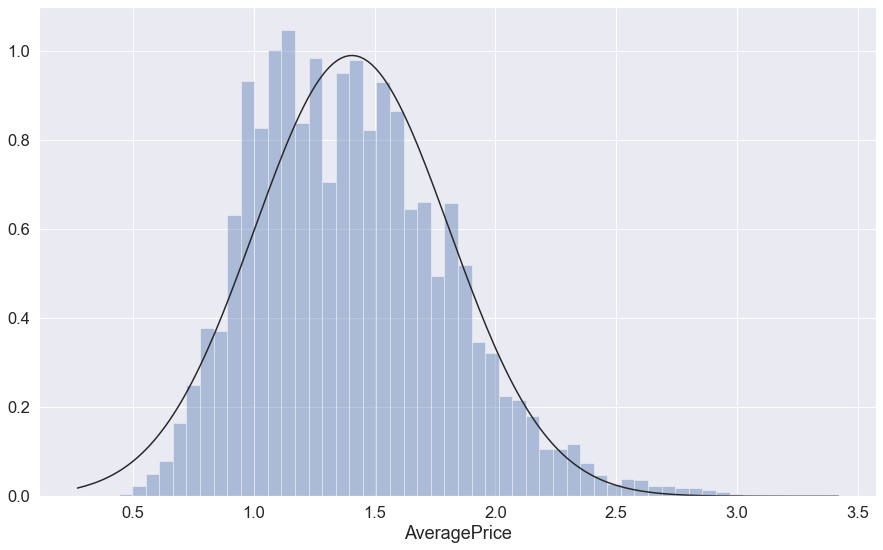

In [49]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice,kde=False,fit=norm)

- Average Price distribution shows that for most cases __price of avocado is between 1.1, 1.4.__

- Let's look at average price of conventional vs. organic. 

<a id=section10></a>

- __Q.3 How Average price is distributed over the months for Conventional and Organic Types?__

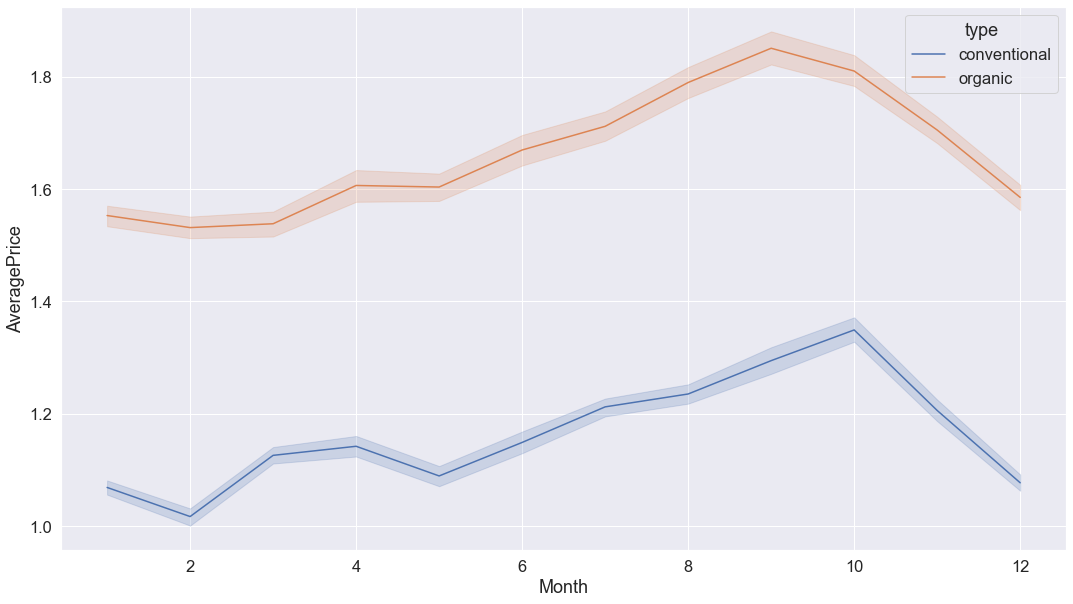

In [50]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

- Looks like there was a __hike between months 8 – 10 for both Conventional and Organic type__ of Avocados prices

###  * Now lets plot Average price distribution based on region 

<a id=section11></a>

- __Q.4 What are TOP 5 regions where Average price are very high?__

In [29]:
df[df.region=='Albany']

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,2018-02-04,1.52,4124.96,118.38,420.36,0.00,3586.22,3586.22,0.00,0.0,organic,2018,Albany,2,4
17609,2018-01-28,1.32,6987.56,433.66,374.96,0.00,6178.94,6178.94,0.00,0.0,organic,2018,Albany,1,28
17610,2018-01-21,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.0,organic,2018,Albany,1,21
17611,2018-01-14,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.0,organic,2018,Albany,1,14


Text(0.5, 1.0, 'Average Price of Avocado According to Region')

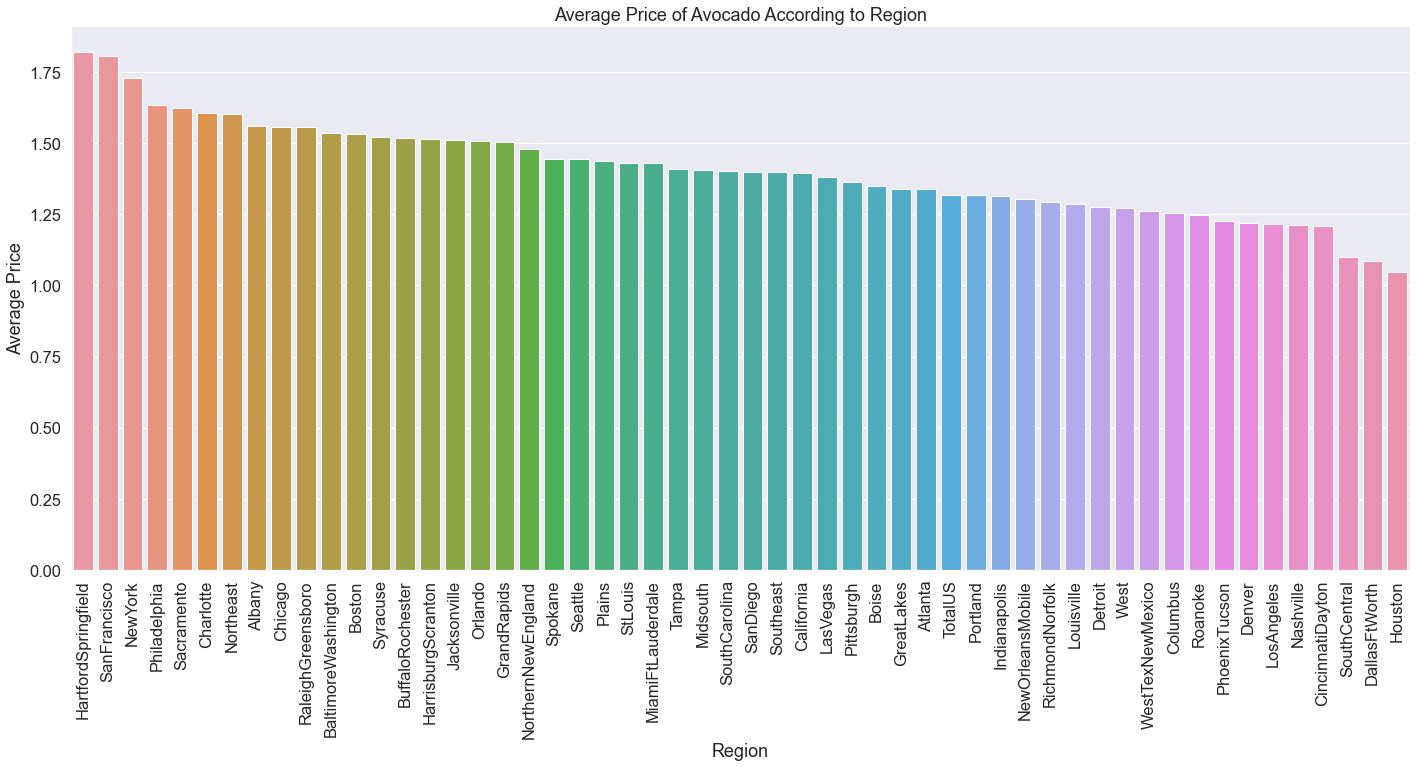

In [109]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

- <ul>Looks like these region are where price is very high
<ul><b><li>HartfordSpringfield</li>
<li>SanFrancisco</li>
<li>NewYork</li>
<li>Philadelphia</li>
    <li>Sacramento</li></b></ul></ul>

<a id=section12></a>

- __Q.5 What are TOP 5 regions where Average consumption is very high?__

In [ ]:
df[df.region=='TotalUS']

Text(0.5, 1.0, 'Average of Total Volume According to Region')

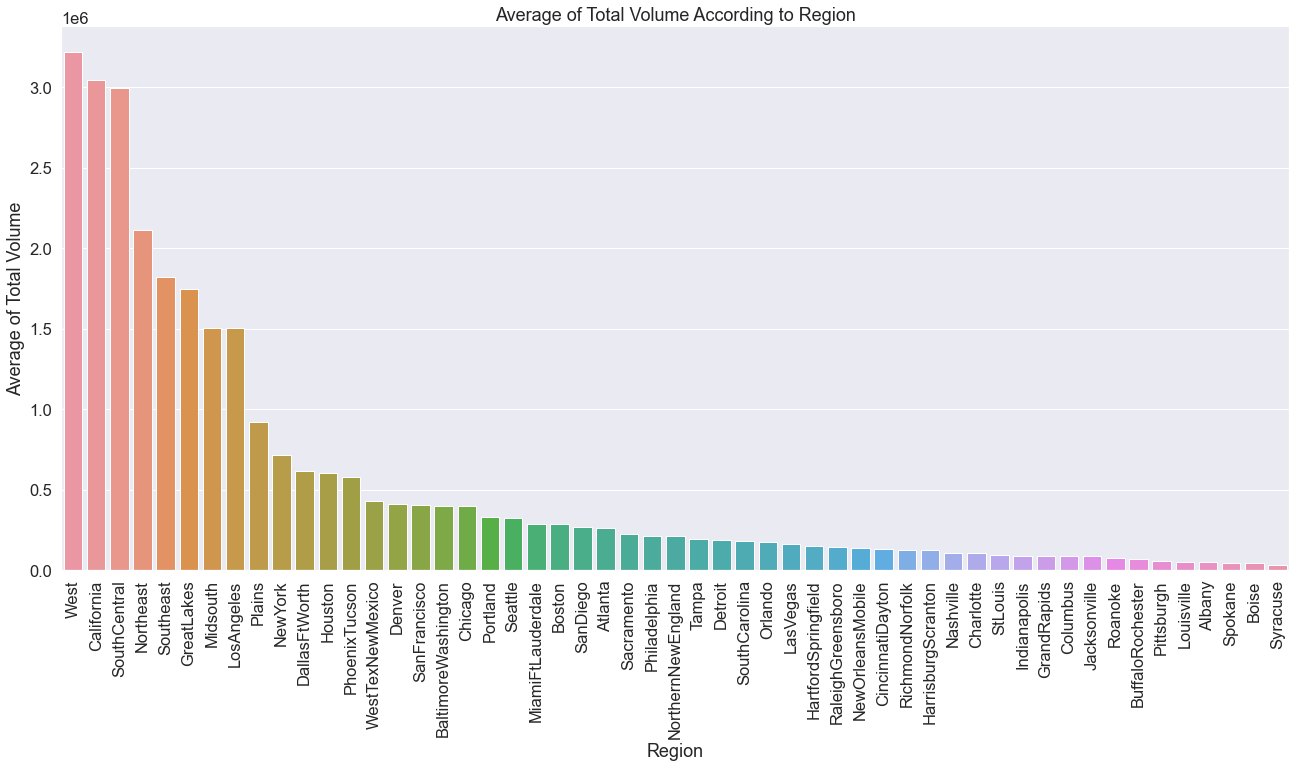

In [110]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

- <ul>Looks like these region are where Consumption is very high
<ul><b><li>West</li>
<li>California</li>
<li>SouthCentral</li>
<li>Northeast</li>
    <li>Southeast</li></b></ul></ul>

<a id=section13></a>

- __Q.6 In which year and for which region was the Average price the highest?__

In [ ]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

- Looks like there was a __huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region. If you'll search it on google, you'll find the same.__

<a id=section14></a>

- __Q.7 How price is distributed over the date column?__

- Now lets do some plots!! I'll start by plotting the Avocado's Average Price  through the Date column

In [51]:
df.Date.value_counts()

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

In [52]:
df[df.Date=='2015-12-27'].mean()

AveragePrice         1.298426
Total Volume    683398.183796
4046            235895.187870
4225            256657.925370
4770             28900.272685
Total Bags      161944.797870
Small Bags      124291.982963
Large Bags       33166.585463
XLarge Bags       4486.229444
year              2015.000000
Month               12.000000
Day                 27.000000
dtype: float64

In [53]:
byDate=df.groupby('Date').mean()
a = byDate.reset_index()
sample = a.sample(n=100)
sample.sort_values(by='Total Bags',ascending=False)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
109,2017-02-05,1.144722,1.522269e+06,546011.592130,513650.210000,42256.659630,420350.173056,321328.938426,96113.705278,2907.529352,2017.0,2.0,5.0
167,2018-03-18,1.313704,1.052537e+06,332766.612685,285818.850370,16241.096204,417703.096204,308390.813426,102752.034167,6560.248611,2018.0,3.0,18.0
164,2018-02-25,1.359630,1.011402e+06,334272.681667,267146.528056,17937.882870,392024.723519,279950.488796,104767.552315,7306.682407,2018.0,2.0,25.0
165,2018-03-04,1.350185,1.035601e+06,348894.357407,292967.505741,14315.347500,379405.846574,285591.463519,87350.231019,6464.152037,2018.0,3.0,4.0
131,2017-07-09,1.540278,9.903010e+05,315830.948704,280577.853704,20224.834444,373667.330000,285541.590185,78866.589907,9259.149907,2017.0,7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2015-02-08,1.310463,8.025102e+05,325193.978981,337260.977037,18503.625741,121551.660833,103258.221019,17947.234630,346.205185,2015.0,2.0,8.0
6,2015-02-15,1.387593,7.003441e+05,313095.715093,245518.214815,20892.192870,120837.979352,103841.492778,16701.016389,295.470185,2015.0,2.0,15.0
2,2015-01-18,1.391111,7.258221e+05,294469.507963,293167.054907,20446.764352,117738.747593,97674.575093,19866.538241,197.634259,2015.0,1.0,18.0
0,2015-01-04,1.301296,7.840216e+05,306465.358704,341213.318796,21100.172593,115242.790648,91759.341667,23015.332407,468.116574,2015.0,1.0,4.0


In [ ]:
byDate.head()

Text(0.5, 1.0, 'Average Price')

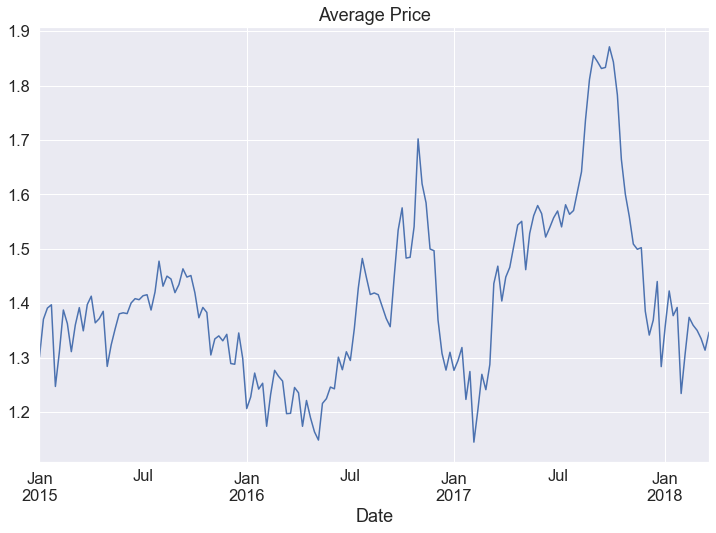

In [54]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

- This also shows there was a huge hike in prices after __July 2017 and before Jan 2018__. This was also confirmed in earlier graph too.
- Cool right? now lets have an idea about the relationship between our Features(Correlation)

<a id=section15></a>

- __Q.8 How dataset features are correlated with each other?__

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

- As we can from the heatmap above, all the Features are not correleted with the __Average Price column__, instead most of them are correlated with each other. So now I am bit worried because that will not help us get a good model. Lets try and see.

- First we have to do some Feature Engineering on the __categorical Features : region and type__

<a id=section16></a>

## * Feature Engineering for Model building

In [55]:
df['region'].nunique()

54

In [56]:
df['type'].nunique()

2

- As we can see we have __54 regions__ and __2 unique types__, so it's going to be easy to to transform the __type feature__ to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

- I will drop the Date Feature as well because I already have __3 other columns for the Year, Month and Day__.

In [57]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [58]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [ ]:
df_final.tail()

<a id=section17></a>

## * Model selection/predictions

- Now our data are ready! lets apply our model which is going to be the __Linear Regression because our Target variable 'AveragePrice' is continuous__.
- Let's now begin to train out regression model! We will need to first split up our data into an __X array that contains the features to train on__, and a __y array with the target variable__.

<a id=section18></a>

- __P.1 Are we good with Linear Regression? Lets find out.__

In [59]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

 - Creating and Training the Model

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [61]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2329713329163767
MSE: 0.09108802805333543
RMSE: 0.30180793238968295


- The __RMSE is low so we can say that we do have a good model, but lets check to be more sure__.
- Lets plot the __y_test vs the predictions__

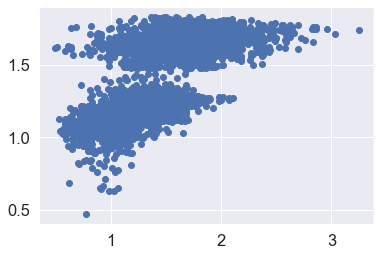

In [62]:
plt.scatter(x=y_test,y=pred)

- As we can see that __we don't have a straight line so I am not sure that this is the best model we can apply on our data__

- Lets try working with the  __Decision Tree Regression model__

<a id=section19></a>

- __P.2 Are we good with Decision Tree Regression? Lets find out.__

In [63]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

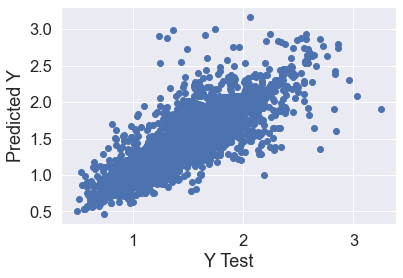

In [64]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

- Nice, here we can see that __we nearly have a straight line__, in other words __its better than the Linear regression model, and to be more sure lets check the RMSE__

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13635342465753425
MSE: 0.04644293150684931
RMSE: 0.2155062215038102


- Very Nice, our __RMSE is lower than the previous one we got with Linear Regression__. Now I am going to try one last model to see if I can __improve my predictions for this data which is the RandomForestRegressor__

<a id=section20></a>

- __P.3 Are we good with Random Forest Regressor? Lets find out.__

In [66]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10013553424657533
MSE: 0.021378607904109583
RMSE: 0.14621425342321995


- Well as we can see the __RMSE is lower than the two previous models__, so the __RandomForest Regressor is the best model in this case.__

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

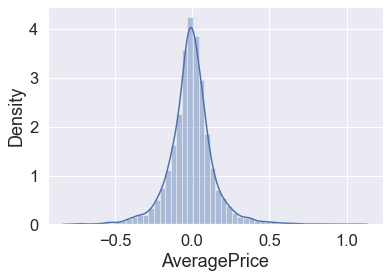

In [68]:
sns.distplot((y_test-pred),bins=50)

- Notice here that our __residuals looked to be normally distributed__ and that's really a __good sign which means that our model was a correct choice for the data.__ 

<a id=section21></a>

- __Lets see final Actual Vs Predicted sample.__

,Y Test,Pred
8604,0.82,0.9405
2608,0.97,0.9912
14581,1.44,1.3906
4254,0.97,0.9070
16588,1.45,1.4373


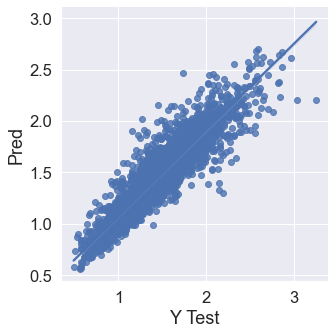

In [69]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

#### P4.Are we good with Adaboost Regressor?lets find out

In [71]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor 

In [79]:
dt=DecisionTreeRegressor()
abr=AdaBoostRegressor(base_estimator=dt,n_estimators=300,random_state=0)
abr.fit(X_train,y_train)
pred=abr.predict(X_test)

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0866876712328767
MSE: 0.017584246575342462
RMSE: 0.13260560536923943


#### Lets do some hyperparameter tuning and check whether model performance increases or not

<a id=section22></a>

In [2]:
import numpy as np
list(np.arange(1,21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid={'bootstrap':[True],"max_depth" : list(np.arange(1,21)),
           "min_samples_leaf":list(np.arange(1,11))}

In [103]:
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 0, return_train_score=True)
g_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [105]:
g_search.best_params_

{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1}

In [107]:
rrf1=RandomForestRegressor(max_depth=20,min_samples_leaf=1,random_state=1)
rrf1.fit(X_train,y_train)
pred=rrf1.predict(X_test)

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10090134075796245
MSE: 0.021478684748463487
RMSE: 0.146556080557797


## * Conclusions

- With the help of notebook  __EDA__ was be carried out using __Pandas and other plotting libraries__.
- Packages like __matplotlib, plotly and seaborn__  were used to develop better insights about the data.<br/>
-  __Data preproceesing__ helps in dealing with __missing values and irregualities__ present in the data. __New features__ which will in turn help us to better predict the survival. 
- Made use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like __type, year/date__ on the __Average price increase/decrease rate__.
- The most important inference drawn from all this analysis is, we get to know what are the __features on which price is highly positively and negatively coorelated with.__ 
- We came to know through analysis that **ADABOOST model**  worked better in predicting the average avocado price of with the help of __low residual and RMSE scores__.
- This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also we got to know __where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions__.